# Classification Analysis on Bank Data
 - Author: Abhishek Narvekar
 - Student number: 649744
 - Date: 31/03/2023
 - Dataset taken from: https://www.kaggle.com/datasets/krantiswalke/bankfullcsv

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* matplotlib
* statsmodels
* pandas
* sklearn
* id3
* xgboost

From these we will need the following libraries:

In [1]:
# enter here all those 'from .... import ....'
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    print('NumPy was not installed, installed and imported')
      
try:
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    print('PyPlot was not installed, installed and imported')   
try:
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    print('statsmodels was not installed, installed and imported')
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    print('pandas was not installed, installed and imported')
try:
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.naive_bayes import CategoricalNB
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    from sklearn.ensemble import StackingClassifier
    from sklearn.pipeline import make_pipeline
    from sklearn.svm import LinearSVC
    from sklearn.ensemble import StackingClassifier
    from sklearn.pipeline import make_pipeline
    from sklearn.svm import LinearSVC
    from sklearn.ensemble import RandomForestClassifier 
    print('sklearn and its packages are already installed, only imported')
except:
    !pip install sklearn
    print('sklearn and its packages was not installed, installed and imported')
try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    print('seaborn was not installed, installed and imported')
try:
    import six
    import sys
    sys.modules['sklearn.externals.six'] = six
    from id3 import Id3Estimator
    print('Id3Estimator already installed, only imported')
except:
    !pip install decision-tree-id3
    print('Id3Estimator was not installed, installed and imported')
try:
    import xgboost as xgb
    print('xgboost was already installed, only imported')
except:
    !pip install xgboost
    print('xgboost was not installed, installed and imported')



NumPy already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported
pandas already installed, only imported
sklearn and its packages are already installed, only imported
seaborn already installed, only imported
Id3Estimator already installed, only imported
xgboost was already installed, only imported


c:\Users\abhis\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# 1. The Data
We are going to use the datafile **bank.csv**.This data is related with direct marketing campaigns of a banking institution from portugal.The bank use this information which is mainly of customers to strategize a marketing campagin to launch a new product.

text taken from source: https://www.kaggle.com/datasets/krantiswalke/bankfullcsv
 

In [2]:
# enter the code to load the data
bankDF = pd.read_csv('bank.csv', sep=',')

Here's a quick look at the data:

In [3]:
bankDF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


The column names of this dataset are described as follows:

- **age**: The age of the customer
- **job**: The type of job this customer does.
- **marital**: The relationship status of this customer
- **education**: The current educational level of this customer
- **default**: Checking if this customer has a credit default or not
- **balance**: The average yearly balance of this customer in euros
- **housing**: Checking if this customer has a housing loan or not 
- **loan**: Checking if this customer has a personal loan or not?
- **contact**: current mode of contact, for example: cellular, telephone
- **day**: last day of month the customer was contacted
- **month**: last month the customer was contacted
- **duration**: The amount of time spent while the customer was contacted, in seconds
- **campaign**: The amount of times the customer was contacted during the campaign
- **pdays**: The amount of days passed by after the customer was last contacted from previous campagins 
- **previous**: number of times the customer was contacted before the campagin
- **poutcome**: the outcomes of previous marketing campagin
- **target**: check if customer has a term subscription

The above text was taken from: https://www.kaggle.com/datasets/krantiswalke/bankfullcsv

We are only interested in the person's job his relationship status, education and housing loan, so we only choose those fields from our dataset.

In [5]:
bankDF = bankDF[[ 'job', 'marital', 'education', 'housing' ]]
bankDF.head()

,job,marital,education,housing
0,management,married,tertiary,yes
1,technician,single,secondary,yes
2,entrepreneur,married,secondary,yes
3,blue-collar,married,unknown,yes
4,unknown,single,unknown,no


The variables that we will be using for our prediction are as follows:

- **job**: current occupiation of this customer
- **marital**: the material status status of this customer
- **education**: the current educational level of the customer
- **housing**: does the customer have a housing loan or not

The above text taken from: https://www.kaggle.com/datasets/krantiswalke/bankfullcsv

In this assignment, we will be using our independent variables: 'job', 'marital' and 'education' and predict the dependent variable 'housing' to check if the person has a housing loan or not based on the independent variables.

*note:* Its easiest if your independent x variables are numeric.

**Since our variables are not numerical we will Convert the fields into categorical using Categorical() method in pandas**

In [4]:
bankDF["job"] = pd.Categorical(bankDF["job"])
bankDF["marital"] = pd.Categorical(bankDF["marital"])
bankDF["education"] = pd.Categorical(bankDF["education"])
bankDF["housing"] = pd.Categorical(bankDF["housing"])

The categorical dependent variable **housing** has the following categories:

In [6]:
# code that returns the different categories in the y variable.
bankDF["housing"].cat.categories

Index(['no', 'yes'], dtype='object')

We'll also need some training and testing data, so:

In [7]:
# convert the following independent and dependent into numpy array
selectionArray = np.asarray(bankDF["job"].cat.codes)
selectionArray = np.dstack((selectionArray, np.asarray(bankDF["marital"].cat.codes)))
selectionArray = np.dstack((selectionArray, np.asarray(bankDF["education"].cat.codes)))
selectionArray = np.dstack((selectionArray, np.asarray(bankDF["housing"].cat.codes)))
selectionArray = np.squeeze(selectionArray)

X=selectionArray[:,0:3]
y=selectionArray[:,3]

# code to split data in training and testing
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)



All set, lets try to predict this using our independent variables mentioned below:

- **job**
- **marital**
- **education**

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Clustering techniques were discussed. Lets explore how these perform on the data.

Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

dummy classifier sratified accuracy score: 0.5045617915399503


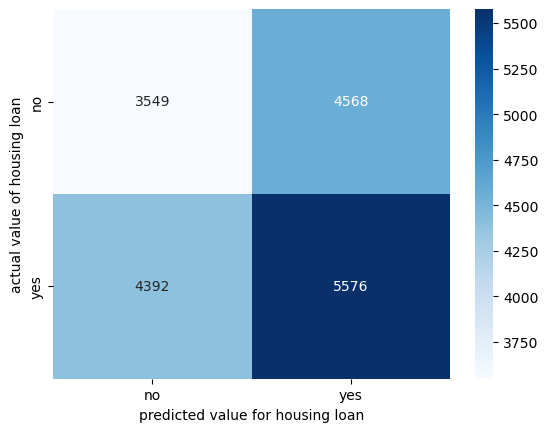

In [9]:
# code to create, fit and measure the dummy classifiers (see chapter 5.4. in the lecture notebook)
# include both the accuracy score and the confusion matrix for each.
# Dummy classifier, using stratified
y_label = bankDF["housing"].cat.categories
y_Length = len(y_label)

dummyStratifiedClassifier = DummyClassifier(strategy="stratified")
dummyStratifiedClassifier = dummyStratifiedClassifier.fit(X_train, Y_train)
y_Stratified_Prediction = dummyStratifiedClassifier.predict(x_test)
print('dummy classifier sratified accuracy score:', metrics.accuracy_score(y_test, y_Stratified_Prediction))

sns.heatmap(confusion_matrix(y_test, y_Stratified_Prediction), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


Based on the data assigned randomly we have the following results mentioned below:

- **accuracy score**: This number means that our model was 50.4% correct with our testing data.

The confusion matrix on the other hand gives us more detailed overview:

- On the **top left section**, the value we get is 3549 which means that our model predicted a 'no' for housing loan and it was  actually 'no' for housing loan 3549 times.

- On the **bottom right section**, the value we get is 5576  which means that our model predicted a 'yes' for housing loan and it was indeed actually a 'yes' for housing loan 5576 times.

- The other values in the **top-right section** and **bottom-left** section are false positive and false negative values, which means 4568 times our model predicted a 'yes' to housing loan but was 'no' and 4392 times our model predicted a 'no' to housing loan but was a 'yes' to housing loan

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

Naive Bayes is a therom which is named after a popular mathematican Thomas Bayes. This therom particularly helps in calculating probability of a certain type of hypothesis given the certain set of scenario or knowledge has already occured.

Let's Understand how the naive bayes therom work with an example:
(Example is inspired from the dataset we are using here.)

Suppose we want to check the probability of a particular personal loan given by the bank to the customers based on their occuption.
We would like to check what are the odds of the bank giving a personal loan to account holder considering someone works as a website designer in an IT company.

We can calculate the probability using the bayes therom given below:
\begin{equation*}
P(loan given|web designer) = \frac{P(web designer|loan given)\times P(loan given)}{P(web designer)}
\end{equation*}

The meaning of each equaltion is mentioned below:
- P(loan given|web designer) = We want to calculate this, so this is read as: find the probability of the loan given by bank considering that he/she is web designer.

- P(web designer|loan given) = calculate the probability of he/she being a web designer, considering that the loan was given by the bank.

- P(loan given): calculating the probability of loan given considering the entire data of the bank.

- P(web designer): calculating the probability of someone being a web designer

Lets create and fit this model:

In [10]:
# code to create the model, and fit the data.
categoricalnb = CategoricalNB()
categoricalnb.fit(X_train, Y_train)
y_prediction = categoricalnb.predict(x_test)

Now to measure its performance:

model naive bayes accuracy score: 0.6188001105888858


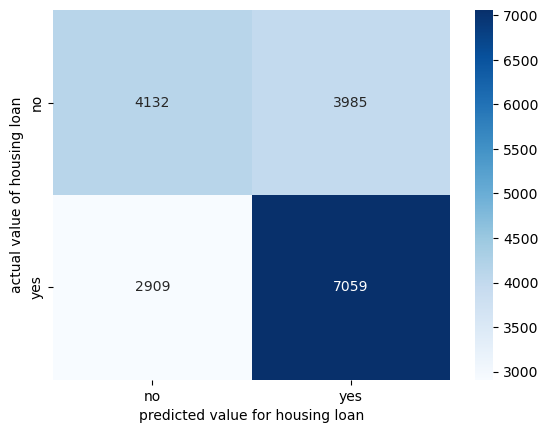

In [11]:
# code to show its accuracy score AND confusion matrix.
y_label = bankDF["housing"].cat.categories
y_Length = len(y_label)
print("model naive bayes accuracy score:", metrics.accuracy_score(y_test, y_prediction))

sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


- **model accuracy score**: Our model correctly classifies 61.9% of the instances with our testing data.

- In this case, On the **top left section**, the value we get is 4132 which means that our model predicted a 'no' for housing loan and it was  actually 'no' for housing loan 4132 times.

- In this confusion matrix, the value we get in the **bottom right section** is 7059, which means that our model predicted a 'yes' to housing loan and it actually was red 7059 times

-  The other values in **bottom left section** and **top right section** are all the cases where our model predicted values incorrectly, so 3985 times it predicted 'yes' to housing loan but it was actually a 'no' and 2909 times it predicted a 'no' to housing loan but it actually was a 'yes'


After analysing the results of confusion matrix and accuracy score we can conclude the following below: 
The accuracy score of naive bayes is 61.8% and the accuracy score of dummy classifier is 50.4% against the testing data. This states that, in this case naive bayes is the best model for performing classification compared to the dummy classifier. 

Lets also have a look at what a prediction would be. If the **<span style ='background:yellow'>job<span>** is of type **<span style ='background:yellow'>lawyer</span>** and the **<span style ='background:yellow'>marital</span>** is of type **<span style ='background:yellow'>seperated</span>**, then this model will predict:

accuracy score: 0.5558197401161183


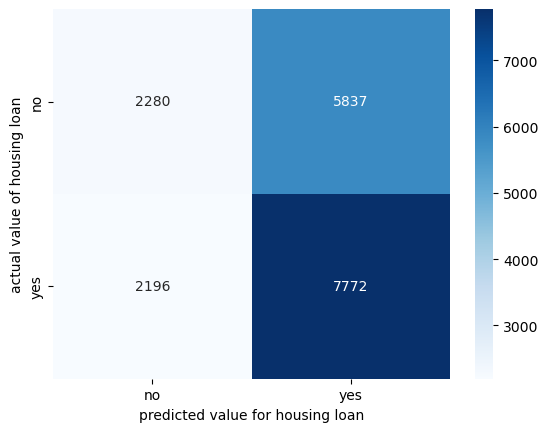

In [21]:
# code to show the prediction

#the original data
originalBankData = bankDF[[ 'job', 'marital', 'housing' ]]
jobTypes = {
              'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4,
              'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9,
              'unemployed': 10, 'unknown': 11, 'lawyer': 12
}

maritalTypes = {
    'divorced': 0, 'married': 1, 'single': 2, 'seperated': 3
}

housing = {
    'no': 0, 'yes': 1
}


# Convert 'job' to numerical values as datatype of type 'list'
numJobType = [jobTypes[i] for i in originalBankData["job"]]
numJobType = pd.DataFrame(numJobType)

numMaritalType = [maritalTypes[i] for i in originalBankData["marital"]]
numMaritalType = pd.DataFrame(numMaritalType)

housingType = [housing[i] for i in originalBankData["housing"]]
housingType = pd.DataFrame(housingType)

# Combine the two data frames
originalBankData = pd.concat([originalBankData, numJobType], axis=1, sort=False)
originalBankData = pd.concat([originalBankData, numMaritalType], axis=1, sort=False)
originalBankData = pd.concat([originalBankData, housingType], axis=1, sort=False)

# Remove the original 'job' and 'housing'
originalBankData = originalBankData.drop(["job"], axis=1)
originalBankData = originalBankData.drop(["marital"], axis=1)
originalBankData = originalBankData.drop(["housing"], axis=1)


#rename columns
originalBankData.columns = ["job", "marital", "housing"]

#remove any missing values if there are any
originalBankData=originalBankData.dropna()

#Convert output variable to categorical
originalBankData['job']=pd.Categorical(originalBankData['job'])
originalBankData['marital']=pd.Categorical(originalBankData['marital'])
originalBankData['housing']=pd.Categorical(originalBankData['housing'])

# Now get X and Y:
X = originalBankData[[ "job", "marital" ]]
y = originalBankData["housing"]

# And convert them to a numpy array
X = np.asarray(X)
y = np.asarray(y)

#split the data
X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(X, y, test_size=0.4,random_state=45)

#create a model
gaussianNB = GaussianNB()
gaussianNB.fit(X_trainNB, y_trainNB)
y_prediction = gaussianNB.predict(X_testNB)


print("accuracy score:", metrics.accuracy_score(y_testNB, y_prediction))

sns.heatmap(confusion_matrix(y_testNB, y_prediction), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

Support vector machines, are commonly used for performing classification. They clearly classify our dataset into clear distinct classes. This is commonly done by on xy graph plane by drawing a line or hyperplane between the gaps of distinct classes. Doing this helps us classifying that specific type of category which is situated on either side of the hyperplane. The support vector machine method help us in classifying the best hyperplane from our dataset, thus helping us clearly classifying the variables in our dataset into clear distinct categories.

The basic kernel is the linear one, so we'll attempt that first:

In [12]:
# code to create the model, and fit the data.
supportVectorMachineLinear = SVC(kernel='linear')
supportVectorMachineLinear.fit(X_train, Y_train)
y_predictionsvm = supportVectorMachineLinear.predict(x_test)


Measuring its performance....

support vector machine linear accuracy score: 0.5511750069118053


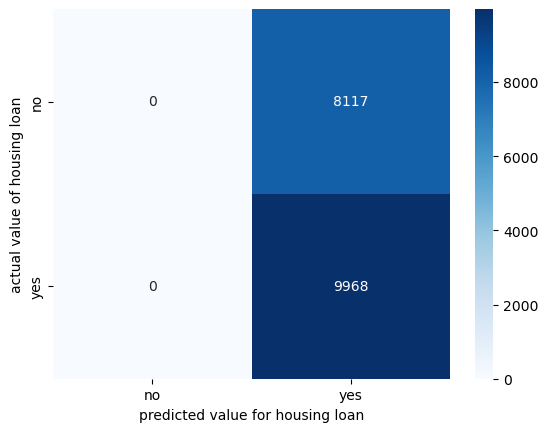

In [13]:
# code to show its accuracy score AND confusion matrix.
print('support vector machine linear accuracy score:', metrics.accuracy_score(y_test, y_predictionsvm))

#The confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predictionsvm), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

The accuracy score for support vector machines(svm) in linear form is 55% and Naive Bayes was 61.8%, and for dummy classifiers is 50.4%. Therefore The svm linear performed better than Dummy Classifier but not so better than Naive Bayes. So in this case, Naive Bayes indeed has the highest accuracy score of all, which states that Naive Bayes, in this case is the best performing model for the classification of our data.

svm linear was not accurate in predicting the actual cases of 'no' to housing loan, but predicted actual 'yes' to housing loan a significant amount of times. The confusion matrix shows that svm linear was not able to predict any false negative, but also predicted false positive values a significant amount of times. which is the value 8817 where our model predicted it to be 'yes' to housing loan but it actually was a 'no' to housing loan. 

Lets do the same for the other kernels that were discussed, i.e. rbf, polynomial, and sigmoid.

accuracy score for rbf kernel: 0.6047553220901299


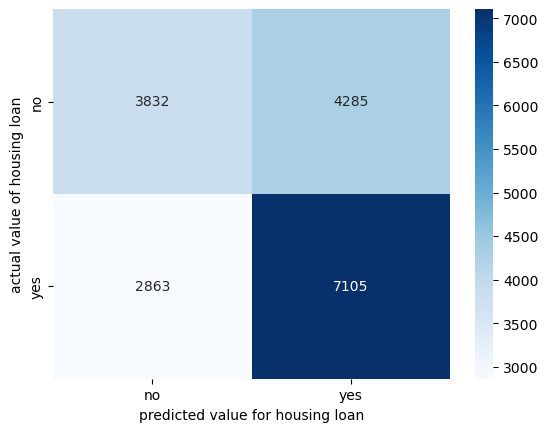

In [14]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.

#Using the rbf kernal in  support vector machines
supportVectorMachineRBF = SVC(kernel='rbf')
supportVectorMachineRBF = supportVectorMachineRBF.fit(X_train, Y_train)
y_prediction_svmrbf = supportVectorMachineRBF.predict(x_test)

#print the accuracy score of this kernel
print("accuracy score for rbf kernel:", metrics.accuracy_score(y_test, y_prediction_svmrbf))

#plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_svmrbf), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


accuracy score with polynomial kernel: 0.5631739010229472


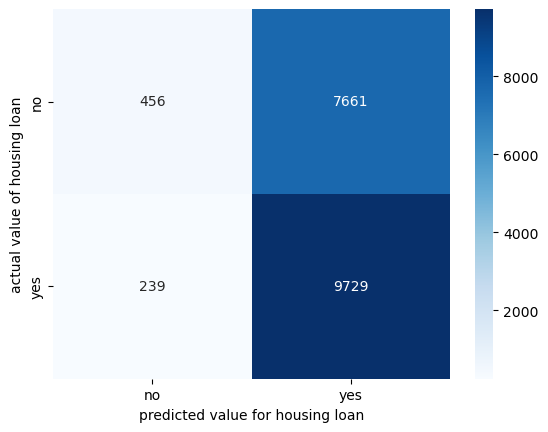

In [15]:
#Using the polynomial kernal in  support vector machines
supportVectorMachinePoly = SVC(kernel='poly')
supportVectorMachinePoly = supportVectorMachinePoly.fit(X_train, Y_train)
y_predictionsvmpoly = supportVectorMachinePoly.predict(x_test)

#print the accuracy score of this kernel
print('accuracy score with polynomial kernel:', metrics.accuracy_score(y_test, y_predictionsvmpoly))

#show the confusion matrix of this kernel
sns.heatmap(confusion_matrix(y_test, y_predictionsvmpoly), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

accuracy score with sigmoid kernel: 0.5030688415814211


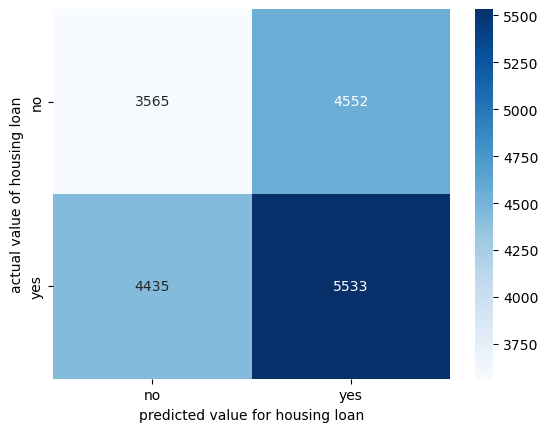

In [16]:
# Using the sigmoid kernel in support vector machines
supportVectorMachineStigmoid = SVC(kernel='sigmoid')
supportVectorMachineStigmoid = supportVectorMachineStigmoid.fit(X_train, Y_train)
y_predictionsvmsig = supportVectorMachineStigmoid.predict(x_test)

#print the accuracy score of this kernel
print('accuracy score with sigmoid kernel:', metrics.accuracy_score(y_test, y_predictionsvmsig))

sns.heatmap(confusion_matrix(y_test, y_predictionsvmsig), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


After analysing the accuracy score of kernels of support vector machine(svm) rbf stigmoid, polynomial and linear, The accuracy score of rbf of svm kernel is highest compared to stigmoid, polynomial and linear svm kernel so in this case svm rbf is a better performing model for classification of our data compared compared to all others.

Comparing the accuracy score of svm rbf and dummy classifier, the accuracy score of svm rbf is way better than that of dummy classifier. So svm rbf is a better performing model for the classification of our data than the dummy classifier.The confusion metrix on the other hand gave us way accurate results than the confusion matrix of dummy classifier.

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

Knn methods gets the data from our dataset, starts to process our dataset which takes quite a lot of time. It can only then make a prediction for us based on if we request it. The knn method then decides on what particular category or group a particular object belongs to.

When using this knn method the main idea is to predict the category of a newly plotted datapoint in our dataset. This is mainly done by drawing a best possiable line or hyperparameter in a graph that best seperates the data into distinct categories thus, helping us classify them. The hyperparameters in this case can be denoted by the value of 'k'. 

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [17]:
# use the StandardScaler to normalize the two x variables
knnScaler = StandardScaler()
knnScaler.fit(X_train)

X_trainScaled = knnScaler.transform(X_train)
X_testScaled = knnScaler.transform(x_test)

Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

In [18]:
# Code to create the graph with Error Rate vs. K-values.
# Let's check the error rate first, from k=1 to let's say k=90

model_error_rate = []
for i in range(1, 90):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, Y_train)
    y_prediction_i = knn.predict(X_testScaled)
    model_error_rate.append(np.mean(y_prediction_i != y_test))

c:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

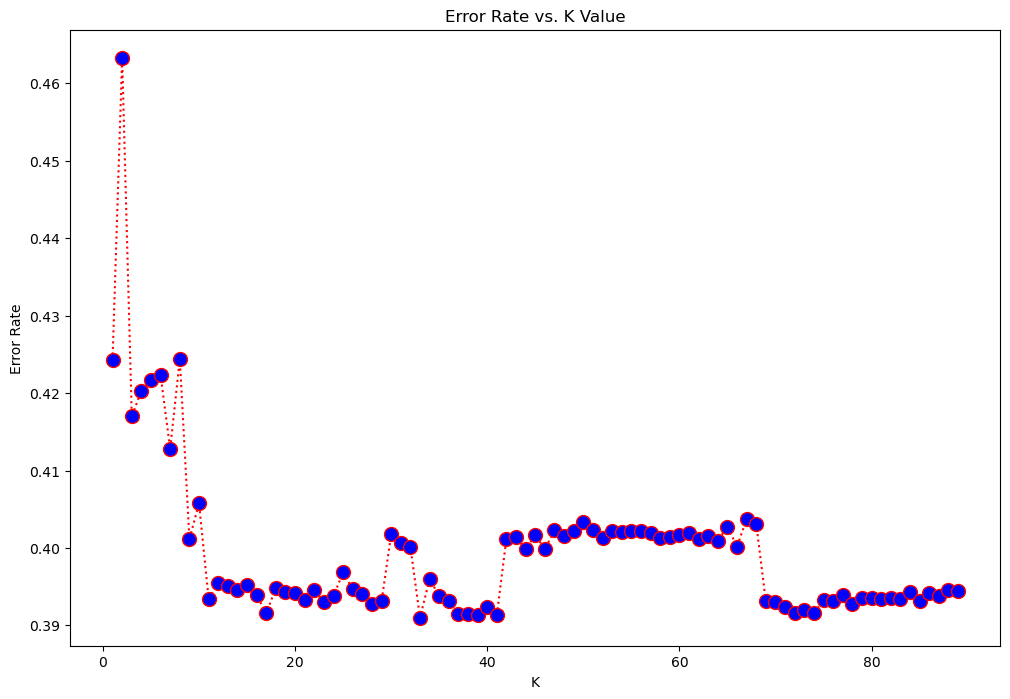

In [19]:
#plotting the graph with error_rate vs K-values.
plt.figure(figsize=(12, 8))
plt.plot(range(1, 90), model_error_rate, color='Red', linestyle='dotted', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 2.3.2 The GridSearch Techinque

The code mentioned below was taken from jupyter notebook which was then originally taken from: https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

The code Below uses RandomizedSearchCV instead of GridSearchCV. GridSearchCV requires a lot of computational time to process our data since our dataset is very large, so training and selecting combination for our model will take a lot time since our hyperparameter range will be large. RandomizedSearchCV on the other hand takes randomized combinations of our hyperparameters and will therefore be have less computational time and give us faster results.

The idea of code that made me decide this approach is inspired from: https://www.projectpro.io/recipes/find-optimal-parameters-using-randomizedsearchcv-for-regression

In [20]:
## List of Hypterparamters we would like to use
model_leaf_size = list(range(1, 50))
model_n_neighbours = list(range(1, 80))
p=[2, 3]

## converting the above values into dictionary of hyperparameters values to search
model_hyperparameters = dict(leaf_size=model_leaf_size, n_neighbors=model_n_neighbours, p=p)

#Initialize a new knn Object
knn_2 = KNeighborsClassifier()


##using GridSearchCV from sklearn.model_selection
gridSearchCV = RandomizedSearchCV(knn_2, model_hyperparameters, cv=10)

#fit the model
gridSearchCV_Model = gridSearchCV.fit(X_trainScaled, Y_train)

#output the value of the best parameters
print('Best model_leaf_size:', gridSearchCV_Model.best_estimator_.get_params()['leaf_size'])
print('Best model p:', gridSearchCV_Model.best_estimator_.get_params()['p'])
print('Best n_neighbours:', gridSearchCV_Model.best_estimator_.get_params()['n_neighbors'])


c:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best model_leaf_size: 41
Best model p: 3
Best n_neighbours: 61


c:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


After analysing the results of the graph and using RnadomizedGridSearchCV, we can see that on the graph at maybe let say 68 the error rate becomes constant and does not change significantly but the value we get from GridSearch techinque is 61. This maybe due to the fact that we are using RandomizedSearchCV instead of GridSearchCV since RandomizedGridSearchCV takes combinations randomly. Since the value taken from the graph seems to be more accurate let's take the value of k to be 68.

- *Note:* +0.5 if you also use the GridSearch technique to decide on k.

Now that we know what we want k to be, we can create the model.

In [21]:
# code to create the model with the selected k
# using n_neighbour(k)=68

knn_3 = KNeighborsClassifier(n_neighbors=68)
knn_3.fit(X_trainScaled, Y_train)

KNeighborsClassifier(n_neighbors=68)

Lets find out how good it is:

c:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score with k-nearest neighbour: 0.5969035111971247


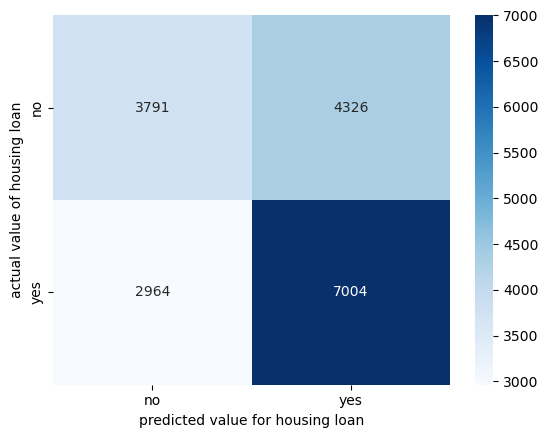

In [22]:
# code to show its accuracy score AND confusion matrix.
y_label = bankDF["housing"].cat.categories
y_Length = len(y_label)

y_prediction_3 = knn_3.predict(X_testScaled)
print('Accuracy score with k-nearest neighbour:', metrics.accuracy_score(y_test, y_prediction_3))

#plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_3), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

The accuracy score of knn is about 59.7%, the svm rbf kernel is 60.4%, the naive bayes is 61.8% and dummy classifier is 50.4%. So the knn techinque  performed better than dummy classifier but not so better than svm rbf kernel and naive bayes.

Therefore, the highest accuracy was obtained by Naive Bayes, which states that this is a the best performing model than that of others for classification in our dataset. The svm rbf kernel has a better accuracy than knn and dummy classifier. The knn method had better accuracy than dummy classifier, signifying that dummy classifier is not usefull for classification.

One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees. 

The Decision tree method seperates the data into with different categories and then assigns target labels. It first analyses the dataset and then selects the what exactly seperates the instances in our dataset into various kind of groups then it assigns a label to it.

Our dataset will then be partioned into different categories which is based on the value of the selected feature. 

The following variations were discussed:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

accuracy score in Id3 variation: 0.5672103953552668


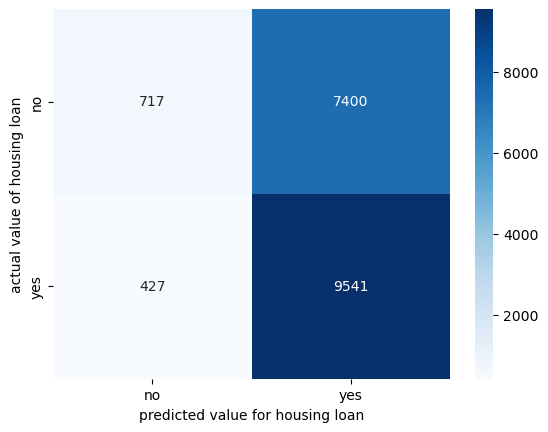

In [23]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.

#Decision tree Using the ID3 variation

id3_dtv = Id3Estimator()
id3_dtv.fit(X_trainScaled, Y_train)
y_prediction_id3_dtv = id3_dtv.predict(X_testScaled)

#printing the accuracy score
print('accuracy score in Id3 variation:', metrics.accuracy_score(y_test, y_prediction_id3_dtv))

#showing the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_id3_dtv), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


accuracy score with gini decision decision tree classifier: 0.6178601050594416


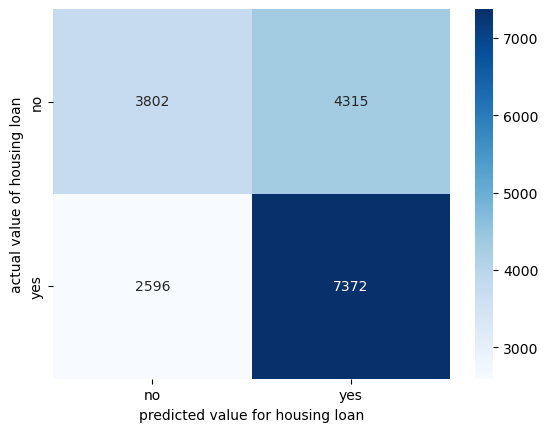

In [24]:
# Decision Tree using the Gini Variation

gini_decisionTreeClassifier = DecisionTreeClassifier(criterion="gini")
gini_decisionTreeClassifier.fit(X_trainScaled, Y_train)
y_prediction_ginidtc = gini_decisionTreeClassifier.predict(X_testScaled)

#printing the accuracy score of gini
print('accuracy score with gini decision decision tree classifier:', metrics.accuracy_score(y_test, y_prediction_ginidtc))

#showing the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_ginidtc), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()



accuracy score of random forest classifier: 0.6179706939452585


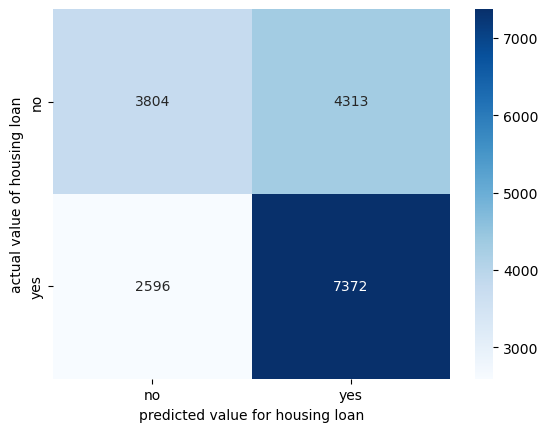

In [25]:
# using the Decision Tree Variation with Random Forest or also known as Extra Trees

randomForestClassifier = ExtraTreesClassifier(random_state=0)
randomForestClassifier = randomForestClassifier.fit(X_trainScaled, Y_train)
y_prediction_randomForest = randomForestClassifier.predict(X_testScaled)

#printing the accuracy score of random tree classifier
print('accuracy score of random forest classifier:', metrics.accuracy_score(y_test, y_prediction_randomForest))

sns.heatmap(confusion_matrix(y_test, y_prediction_randomForest), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()
 

After Analysing the results above the accuracy score of random forest classifier was slightly better than gini decision tree classifier, so we can say that random forest tree classifier performed better than gini decision tree classifier and Id3 variation.

When compared to the results of dummy classifiers, Naive Bayes(NB) and svm kernels and knn we can say that, Accuracy score of random forest classifier in decision tree is better than the accuracy score of dummy classifier and knn method.
Accuracy score of Naive Bayes is better than the accuracy score of random forest classifier in decision tree.On the other hand the decision tree of classifier is better than the accuracy score of svm kernel.

Therefore, naive bayes is the best accuracy score than of all others stating that this is the best performing model for the classification of our dataset. 


One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

linear discriminant analysis accuracy score: 0.5609621233066077


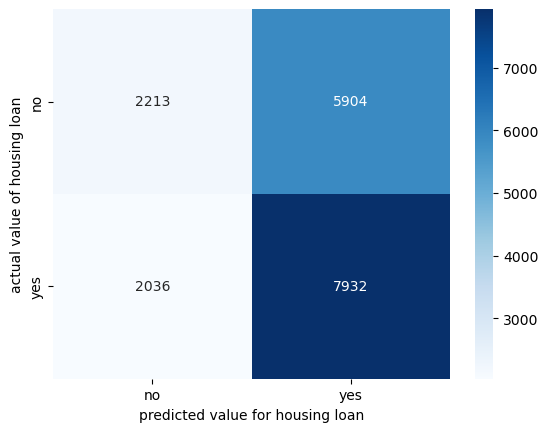

In [26]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.

#Using the Linear Discriminant Analysis
linearDiscriminantAnalysis = LinearDiscriminantAnalysis()
linearDiscriminantAnalysis_Model = linearDiscriminantAnalysis.fit(X_trainScaled, Y_train)
y_prediction_linearda = linearDiscriminantAnalysis_Model.predict(X_testScaled)

#printing the accuracy score in linear discriminant analysis
print('linear discriminant analysis accuracy score:', metrics.accuracy_score(y_test, y_prediction_linearda))

#showing the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_linearda), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


quadratic discriminant analysis accuracy score: 0.5662703898258225


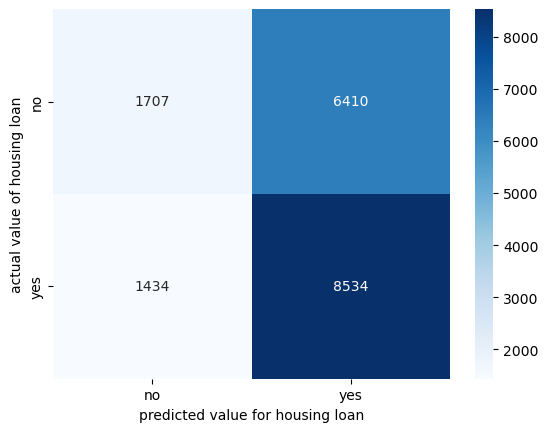

In [27]:
#Using the Quadratic Discriminant Analysis

quadraticDistriminantAnalysis = QuadraticDiscriminantAnalysis()
quadraticDistriminantAnalysis = quadraticDistriminantAnalysis.fit(X_trainScaled, Y_train)
y_prediction_qda = quadraticDistriminantAnalysis.predict(X_testScaled)

#printing the accuracy score
print('quadratic discriminant analysis accuracy score:', metrics.accuracy_score(y_test, y_prediction_qda))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_qda), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

logistic regression classifier accuracy score: 0.5609621233066077


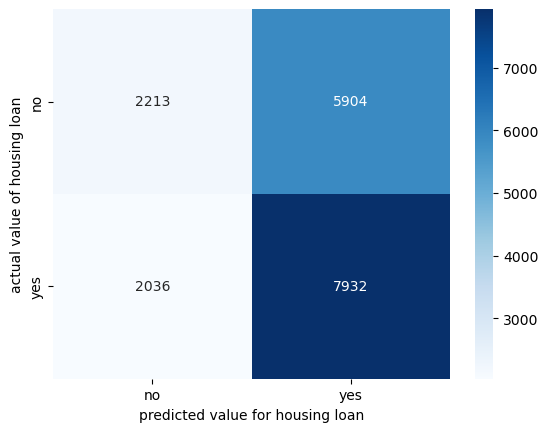

In [28]:
# Using the Logistic Regression Classifier

logRegression = LogisticRegression()
logRegressionModel = logRegression.fit(X_trainScaled, Y_train)
y_prediction_logRegression = logRegressionModel.predict(X_testScaled)

#printing the accuracy score of Logistic Regression Classifier
print('logistic regression classifier accuracy score:', metrics.accuracy_score(y_test, y_prediction_logRegression))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_logRegression), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

multinomial logistic regression classifier accuracy score: 0.5609621233066077


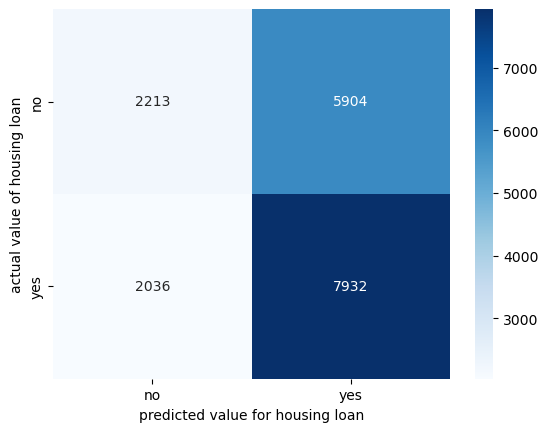

In [42]:
#Using Multinomial Logistic Regression Classification

logMRegClassification = LogisticRegression(multi_class='multinomial')
logRegMClassificationModel = logMRegClassification.fit(X_trainScaled, Y_train)
y_prediction_logMRC = logRegMClassificationModel.predict(X_testScaled)

#printing the accuracy score of Multinomial Logistic Regression Classification
print('multinomial logistic regression classifier accuracy score:', metrics.accuracy_score(y_test, y_prediction_logMRC))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_logMRC), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


Adaptive Boosting accuracy score: 0.6158695051147359


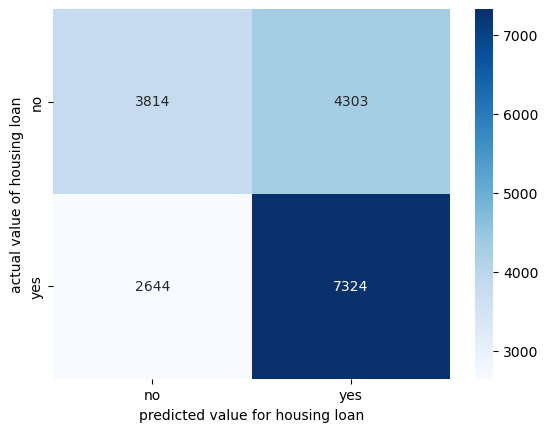

In [29]:
#Using Adaptive Boosting
adaptBoost = AdaBoostClassifier(random_state=0)
adaptBoost = adaptBoost.fit(X_trainScaled, Y_train)
y_prediction_adaptBoost = adaptBoost.predict(X_testScaled)

#printing the accuracy score of Multinomial Logistic Regression Classification
print('Adaptive Boosting accuracy score:', metrics.accuracy_score(y_test, y_prediction_adaptBoost))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_adaptBoost), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

Gradient Boosting accuracy score: 0.6158695051147359


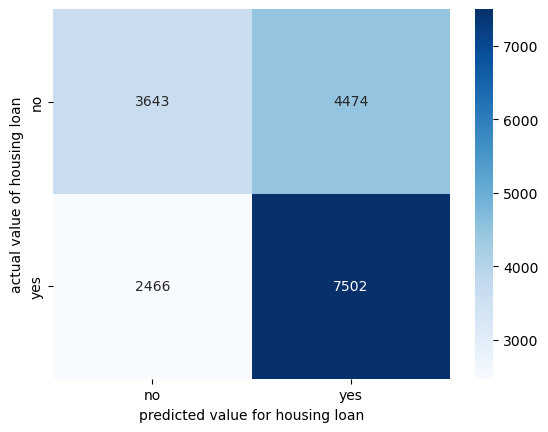

In [30]:
# Using Gradient Boosting
gradBoost = GradientBoostingClassifier(random_state=0)
gradBoost = gradBoost.fit(X_trainScaled, Y_train)
y_prediction_gradBoost = gradBoost.predict(X_testScaled)

#printing the accuracy score of Gradient Boosting
print('Gradient Boosting accuracy score:', metrics.accuracy_score(y_test, y_prediction_adaptBoost))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_gradBoost), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

Histogram Gradient Boosting accuracy score: 0.6163118606580039


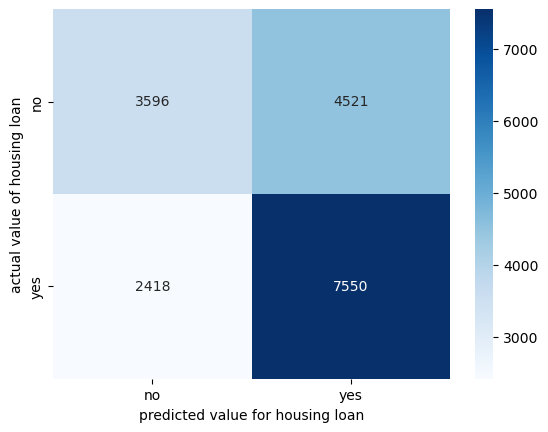

In [31]:
#using Histogram Gradient Boosting
hisstGradBoost = HistGradientBoostingClassifier(random_state=0)
hisstGradBoost = hisstGradBoost.fit(X_trainScaled, Y_train)
y_prediction_hisstGradBoost = hisstGradBoost.predict(X_testScaled)

#printing the accuracy score of Gradient Boosting
print('Histogram Gradient Boosting accuracy score:', metrics.accuracy_score(y_test, y_prediction_hisstGradBoost))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_hisstGradBoost), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()

The code mentioned below for XGBoost was taken from jupyter notebook using this link mentioned there: https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/ 

XGBoost accuracy score: 0.618025988388167


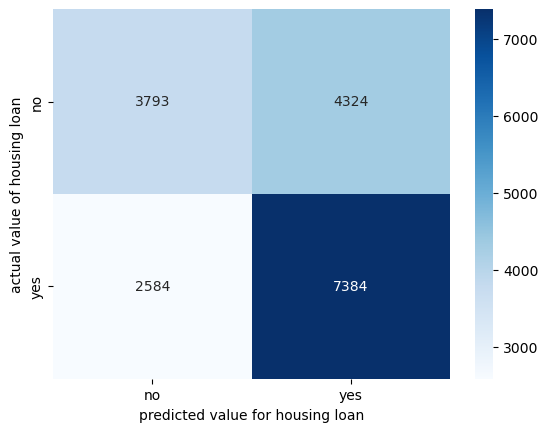

In [32]:
#Using XGBoost
xgboostClassifier = xgb.XGBClassifier()
xgboostClassifier = xgboostClassifier.fit(X_trainScaled, Y_train)
y_prediction_xgbBoost = xgboostClassifier.predict(X_testScaled)

#printing the accuracy score of Gradient Boosting
print('XGBoost accuracy score:', metrics.accuracy_score(y_test, y_prediction_xgbBoost))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_xgbBoost), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


Stacking accuracy score: 0.6165883328725463


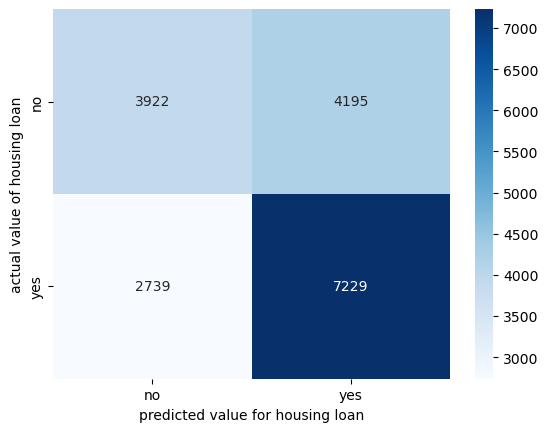

In [33]:
#Using Stacking
stack_estimators = [
    ('rfc', RandomForestClassifier(n_estimators=10, random_state=45)),
    ('svrs', make_pipeline(StandardScaler(), LinearSVC(random_state=45)))
]

stackRCL = StackingClassifier(estimators=stack_estimators, final_estimator= LogisticRegression())
stackRCL.fit(X_trainScaled, Y_train)
y_prediction_stackEstimator = stackRCL.predict(X_testScaled)

#printing the accuracy score of Stacking
print('Stacking accuracy score:', metrics.accuracy_score(y_test, y_prediction_stackEstimator))

#show the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction_stackEstimator), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value for housing loan')
plt.ylabel('actual value of housing loan')
plt.xticks(np.arange(y_Length)+1/y_Length, y_label)
plt.yticks(np.arange(y_Length)+1/y_Length, y_label)
plt.show()


After Comparing the accuracy score of every single techinques mentioned above, the accuracy score XGBoost seems to be the highest compared to the techinques from above. Therefore XGBoost would be the best techinque for classification in our dataset.

After comparding the accuracy score of XGBoost which is 61.8% with knn method which is 59.7%, svm rbf kernel is 60.4% and the naive bayes which is 61.8% and dummy classifier which is 50.4%. We can conclude that in this case the XGBoost and naive bayes are good model for the classification for our dataset. 

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [ ]:
# the code for the function


In [ ]:
# an example of using the function


# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss **<span style ='background:yellow'>\<your chosen technique></span>**.

**<span style ='background:yellow'>\<explain the technique in detail. What does it do and how does it work></span>**

In [ ]:
# example code of using this technique


# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

In [ ]:
# code to load the UFC data


**<span style ='background:yellow'>\<explain your attempt, what did you do.></span>**

In [ ]:
# code that will generate an accuracy score for the outcome that is higher than 0.6747


# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**<span style ='background:yellow'>\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!></span>**

In [ ]:
# code on using this technique


**<span style ='background:yellow'>\<feel free to use more cells for this, you probably need them></span>**